In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

file_path = 'winequalityN.csv'
df = pd.read_csv(file_path)

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Cleaning Dataset
In our dataset we find many null values as described below

In [2]:

# Check for null values in each column
null_columns = df.columns[df.isnull().any()]
null_count = df[null_columns].isnull().sum()

# Display columns with null values and their respective counts
for column, count in zip(null_columns, null_count):
    print(f"Column '{column}' has {count} null values.")

# display the entire DataFrame with null values NaN
display(df[df.isnull().any(axis=1)])

Column 'fixed acidity' has 10 null values.
Column 'volatile acidity' has 8 null values.
Column 'citric acid' has 3 null values.
Column 'residual sugar' has 2 null values.
Column 'chlorides' has 2 null values.
Column 'pH' has 9 null values.
Column 'sulphates' has 4 null values.


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


Now we must see what to do with the null values, prune or impute.
We can drop the rows with the null values if it doesn't effect the dataset much.
For this we will see how many and what kind of rows are removed, and to do this we will create a new column called quality label as below.

In [3]:
df['quality_label'] = df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
df.quality_label.value_counts()

quality_label
medium    3915
low       2384
high       198
Name: count, dtype: int64

And now we will drop the rows with null values and see what happens

In [4]:
df = df.dropna()
df.quality_label.value_counts()

quality_label
medium    3894
low       2372
high       197
Name: count, dtype: int64

Since there is not drastic change in values, only 34 removed (0.5% of total) with 1 high, 12 low and 21 medium, the dataset is preserved enough despite dropping rows. Making this option safe to proceed with. 
Let us now visualize the frequency of this data

# Dimensionality Reduction
We will perform both PCA and LDA on the dataset.
But first we will drop the target variables from the dataset and the quality_label we added before.
We will also convert the quality_label low, medium, high to classes 0, 1, 2

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Convert the previous low, medium, high quality_labels to class labels 0, 1, 2
class_ql = {'low':0, 'medium': 1, 'high': 2}
y_quality = df.quality_label.map(class_ql)
cols = df.columns
cols = list(cols.drop(['type', 'quality_label', 'quality']))
reduced_df = df.loc[:, cols]

# Standardize the data
scale = StandardScaler()
reduced_df = pd.DataFrame(scale.fit_transform(reduced_df), index=df.index)

## PCA
Now we perform PCA on the dataset for 1-10 features and see what the variance ratio and K-Nearest-Neighbour Classifier accuracy is on each.

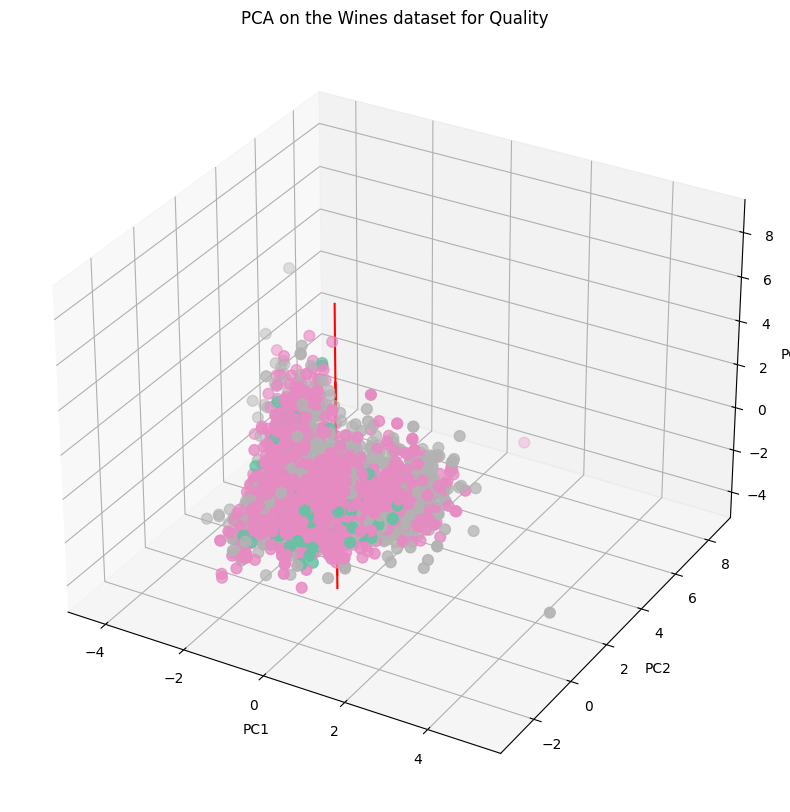

KNeighbors Classifier Training Accuracy: 100.00%
KNeighbors Classifier Test Accuracy: 79.11%
________________________________________

Accuracy on Quality Prediction By Number of PCA Components:



,Var_ratio,Train_Acc,Test_Acc
Components,,,
1,27.554555,1.0,0.665291
2,50.235789,1.0,0.722537
3,64.369581,1.0,0.744714
4,73.197027,1.0,0.771532
5,79.744265,1.0,0.782878
6,85.255531,1.0,0.799897
7,90.011609,1.0,0.798865
8,94.571356,1.0,0.786488
9,97.634674,1.0,0.788035


In [6]:
# Perform PCA
pca_all = PCA(random_state=69, whiten=True).fit(reduced_df)

# Store PCA results
result = pd.DataFrame(pca_all.transform(reduced_df), columns=[f'PCA{i}' for i in range(reduced_df.shape[1])], index=reduced_df.index)

# Plot PCA results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y_quality, cmap="Set2_r", s=60)

# Add axis lines
for dim in range(3):
    axis_line = ((0, 0), (0, 0), (min(result[f'PCA{dim}']), max(result[f'PCA{dim}'])))
    ax.plot(axis_line[0], axis_line[1], axis_line[2], 'r')

# Label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title(f"PCA on the Wines dataset for Quality")
plt.show()

# Split the data for training and testing
X_train, X_test, y, y_test = train_test_split(reduced_df, y_quality, test_size=0.3, random_state=0)

# Train and evaluate K-Nearest Neighbors Classifier
KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
KNC = KNC.fit(X_train, y)

# Display training accuracy
print('KNeighbors Classifier Training Accuracy: {:2.2%}'.format(accuracy_score(y, KNC.predict(X_train))))

# Predict and display test accuracy
y_pred = KNC.predict(X_test)
print('KNeighbors Classifier Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

# Evaluate accuracy by varying the number of PCA components
print('_' * 40)
print(f'\nAccuracy on Quality Prediction By Number of PCA Components:\n')
AccPca = pd.DataFrame(columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])

for components in np.arange(1, reduced_df.shape[1]):
    variance_ratio = sum(pca_all.explained_variance_ratio_[:components]) * 100
    pca = PCA(n_components=components, random_state=101, whiten=True)
    X_train_pca = pca.fit_transform(X_train)
    Components = X_train_pca.shape[1]
    KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
    KNC = KNC.fit(X_train_pca, y)
    Training_Accuracy = accuracy_score(y, KNC.predict(X_train_pca))
    X_test_pca = pca.transform(X_test)
    y_pred = KNC.predict(X_test_pca)
    Test_Accuracy = accuracy_score(y_test, y_pred)
    AccPca = pd.concat([AccPca, pd.DataFrame([(Components, variance_ratio, Training_Accuracy, Test_Accuracy)],
                                        columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])])

AccPca.set_index('Components', inplace=True)
display(AccPca)

## LDA
Now we similarly perform LDA on the dataset, reducing it to 2 dimensions. (Since LDA limits the features to min(total_features, total_classes - 1)). And since we have 3 classes our LDA is limited to 2 dimensions.
KNN Classifier accuracies are also shown for the resulting reduced dataset.

KNC Training Accuracy: 100.00%
KNC Test Accuracy: 79.11%
________________________________________

Apply LDA:

Number of features after LDA: 1
LR Training Accuracy With LDA: 100.00%
LR Test Accuracy With LDA: 74.52%


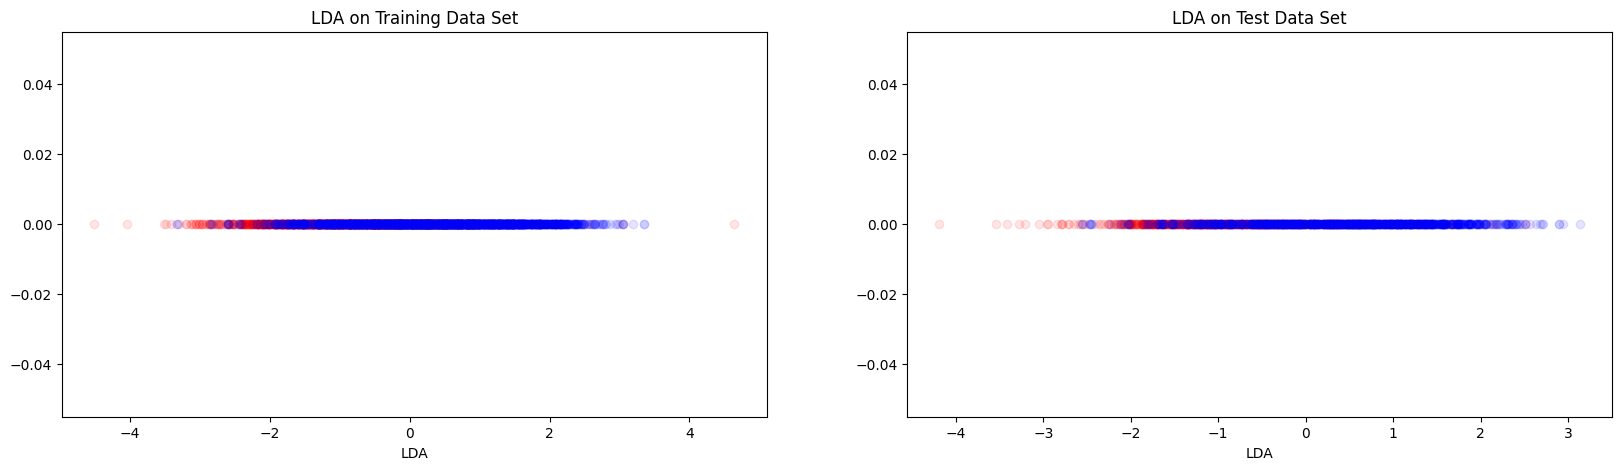

In [7]:
# Split the data for training and testing
X_train, X_test, y_quality, y_test = train_test_split(reduced_df, y_quality, test_size=0.3, random_state=0)

# Train and evaluate K-Nearest Neighbors Classifier without LDA
KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
KNC = KNC.fit(X_train, y_quality)
print('KNC Training Accuracy: {:2.2%}'.format(accuracy_score(y_quality, KNC.predict(X_train))))
y_pred = KNC.predict(X_test)
print('KNC Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))
print('_' * 40)

# Apply Linear Discriminant Analysis (LDA)
print('\nApply LDA:\n')
lda = LDA(n_components=1, store_covariance=True)
X_train_lda = lda.fit_transform(X_train, y_quality)

print('Number of features after LDA:', X_train_lda.shape[1])

# Train and evaluate K-Nearest Neighbors Classifier with LDA
KNC_lda = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
KNC_lda = KNC_lda.fit(X_train_lda, y_quality)
print('LR Training Accuracy With LDA: {:2.2%}'.format(accuracy_score(y_quality, KNC_lda.predict(X_train_lda))))
X_test_lda = lda.transform(X_test)
y_pred_lda = KNC_lda.predict(X_test_lda)
print('LR Test Accuracy With LDA: {:2.2%}'.format(accuracy_score(y_test, y_pred_lda)))

# Plot LDA results
if X_train_lda.shape[1] == 1:
    fig = plt.figure(figsize=(20, 5))
    fig.add_subplot(121)
    plt.scatter(X_train_lda[y_quality == 0, 0], np.zeros((len(X_train_lda[y_quality == 0, 0]), 1)), color='red', alpha=0.1)
    plt.scatter(X_train_lda[y_quality == 1, 0], np.zeros((len(X_train_lda[y_quality == 1, 0]), 1)), color='blue', alpha=0.1)
    plt.title('LDA on Training Data Set')
    plt.xlabel('LDA')
    fig.add_subplot(122)
    plt.scatter(X_test_lda[y_test == 0, 0], np.zeros((len(X_test_lda[y_test == 0, 0]), 1)), color='red', alpha=0.1)
    plt.scatter(X_test_lda[y_test == 1, 0], np.zeros((len(X_test_lda[y_test == 1, 0]), 1)), color='blue', alpha=0.1)
    plt.title('LDA on Test Data Set')
    plt.xlabel('LDA')
else:
    fig = plt.figure(figsize=(20, 5))
    fig.add_subplot(121)
    plt.scatter(X_train_lda[y_quality == 0, 0], X_train_lda[y_quality == 0, 1], color='black', alpha=0.1)
    plt.scatter(X_train_lda[y_quality == 1, 0], X_train_lda[y_quality == 1, 1], color='yellow', alpha=0.1)
    plt.scatter(X_train_lda[y_quality == 2, 0], X_train_lda[y_quality == 2, 1], color='red', alpha=0.1)
    plt.title('LDA on Training Data Set')
    plt.xlabel('LDA')
    fig.add_subplot(122)
    plt.scatter(X_test_lda[y_test == 0, 0], X_test_lda[y_test == 0, 1], color='black', alpha=0.1)
    plt.scatter(X_test_lda[y_test == 1, 0], X_test_lda[y_test == 1, 1], color='yellow', alpha=0.1)
    plt.scatter(X_test_lda[y_test == 2, 0], X_test_lda[y_test == 2, 1], color='red', alpha=0.1)
    plt.title('LDA on Test Data Set')
    plt.xlabel('LDA')

plt.show()


# Conclusion

Now in the end we can decide which method to choose, LDA or PCA for our data preprocessing.
If we choose PCA we possibly will chose 6 features, because of a high variance ratio and high test accuracy.<br>
In the end, PCA has an accuracy of ~79% and LDA has ~76%.<br>
So in this scenario choosing PCA would be wiser, despite LDA being more customized for classification<br>
But as of now we have only used KNN Classifier model, and further model testing is required before coming to a conclusion.
### Tentative Solution: PCA